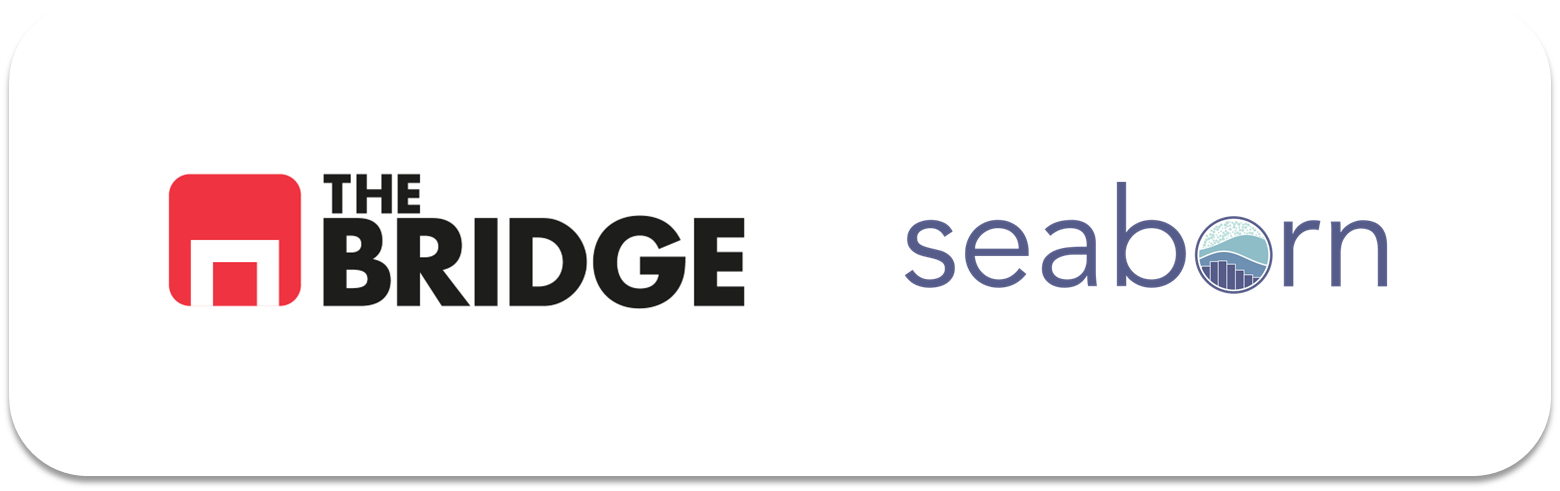

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
ruta_archivo = "./data/california_cities.csv"
df_ciudades = pd.read_csv(ruta_archivo)

print("Contenido inicial")
print(df_ciudades.head())
print("\nInformación del DataFrame antes de la limpieza")
df_ciudades.info()

df_ciudades_limpio = df_ciudades.dropna()

print("\nInformación del DataFrame después de eliminar nulos")
print(f"Filas originales: {len(df_ciudades)}")
print(f"Filas después de dropna: {len(df_ciudades_limpio)}")
df_ciudades_limpio.info()

Contenido inicial
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [3]:
def plot_scatter_avanzado(
    df: pd.DataFrame,
    columna_num1: str,
    columna_num2: str,
    columna_cat: str = None,
    tamano: str | float = 50,  # El tamaño puede ser un nombre de columna (str) o un valor fijo (float)
    escala: float = 1/10000,
    control_leyenda: bool = True # Argumento EXTRA para controlar la leyenda
):
    sns_kwargs = {
        'x': columna_num1,
        'y': columna_num2,
        'data': df,
        'legend': control_leyenda, # Usa el argumento EXTRA
        'alpha': 0.7 # Añadido para mejor visualización de superposiciones
    }

    if columna_cat is not None:
        # 2. Manejo del color (hue) si se proporciona una columna categórica
        sns_kwargs['hue'] = columna_cat
        # Si no hay columna categórica, no se pasa 'hue' para evitar errores de Matplotlib/Seaborn.
        # El color por defecto será el de Seaborn.

    if isinstance(tamano, str):
        # El argumento tamano es un nombre de columna (p.ej., 'pop_2010').
        # Multiplicamos la columna por la escala y usamos ese nuevo valor para el tamaño.
        df['size_scaled'] = df[tamano] * escala
        sns_kwargs['size'] = 'size_scaled' # Usamos la columna escalada para el tamaño
        sns_kwargs['sizes'] = (5, 500) # Rango visual de tamaños
    else:
        # El argumento tamano es un valor fijo (float).
        sns_kwargs['s'] = tamano # Usamos el argumento 's' de Matplotlib subyacente para tamaño fijo

    
    plt.figure(figsize=(10, 6))
    
    # Llamada a la función de Seaborn con los argumentos dinámicos
    sns.scatterplot(**sns_kwargs)
    
    # Título y etiquetas
    plt.title(f'Diagrama de Dispersión: {columna_num2} vs {columna_num1}')
    plt.xlabel(columna_num1)
    plt.ylabel(columna_num2)
    
    # Limpieza de la columna temporal
    if 'size_scaled' in df.columns:
        df.drop(columns=['size_scaled'], inplace=True)
        
    plt.show()

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

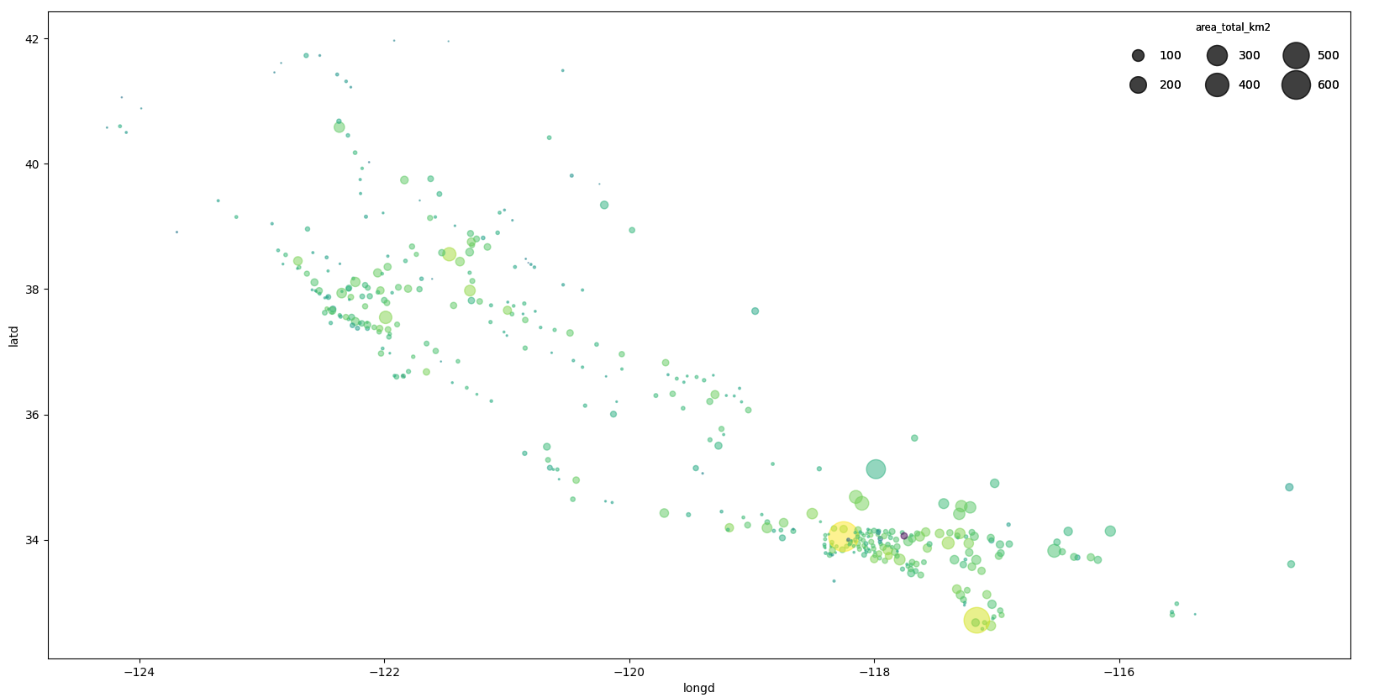

In [4]:
df_ciudades_limpio['log_poblacion'] = np.log10(df_ciudades_limpio['population_total'] / 100)

print("--- Verificación de la nueva columna ---")
print(df_ciudades_limpio[['population_total', 'log_poblacion']].head())
print(df_ciudades_limpio['log_poblacion'].describe())

--- Verificación de la nueva columna ---
   population_total  log_poblacion
0             31765       2.501949
1             20330       2.308137
4             83089       2.919544
5             47823       2.679637
6              2827       1.451326
count    427.000000
mean       2.375175
std        0.655692
min       -2.000000
25%        2.030848
50%        2.449756
75%        2.811913
max        4.589314
Name: log_poblacion, dtype: float64


C:\Users\danma\AppData\Local\Temp\ipykernel_6396\571702435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudades_limpio['log_poblacion'] = np.log10(df_ciudades_limpio['population_total'] / 100)


C:\Users\danma\AppData\Local\Temp\ipykernel_6396\1932269129.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_scaled'] = df[tamano] * escala
C:\Users\danma\AppData\Local\Temp\ipykernel_6396\1932269129.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['size_scaled'], inplace=True)


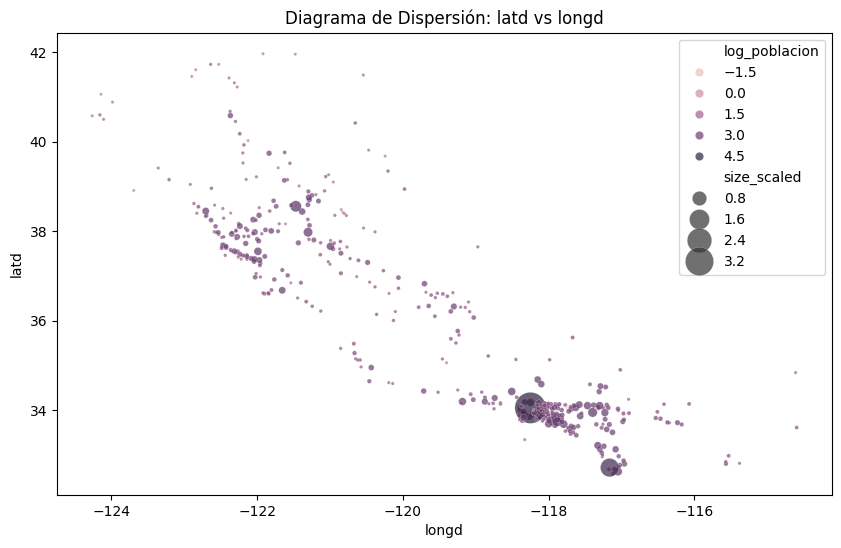

In [5]:
plot_scatter_avanzado(
    df=df_ciudades_limpio,
    columna_num1='longd',
    columna_num2='latd',
    columna_cat='log_poblacion', # Color según el logaritmo de la población
    tamano='population_total',   # Tamaño de la burbuja según la población total
    escala=1/1000000             # Ajuste de escala para que las burbujas sean visibles (o el valor que funcione mejor)
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [9]:
ruta_titanic = "./data/titanic.csv"
df_titanic = pd.read_csv(ruta_titanic)

# 1. Inspeccionar los nombres de las columnas
print("Nombres de todas las columnas en df_titanic:")
print(df_titanic.columns.tolist())

Nombres de todas las columnas en df_titanic:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [10]:
# M1: Tasa de mortalidad general
total_pasajeros = len(df_titanic)
supervivientes = df_titanic['survived'].sum()
fallecidos = total_pasajeros - supervivientes

tasa_supervivencia = supervivientes / total_pasajeros
tasa_mortalidad = fallecidos / total_pasajeros

print(f"\n[Mensaje 1] Tasa de Mortalidad General: {tasa_mortalidad:.2%}")


[Mensaje 1] Tasa de Mortalidad General: 61.62%


In [12]:
# M2: Tasa de supervivencia por Sexo
supervivencia_por_sexo = df_titanic.groupby('sex')['survived'].mean().reset_index()

print("\n[Mensaje 2] Tasa de Supervivencia por Sexo:")
print(supervivencia_por_sexo)


[Mensaje 2] Tasa de Supervivencia por Sexo:
      sex  survived
0  female  0.742038
1    male  0.188908


In [13]:
# M3: Tasa de supervivencia por Clase de Pasaje (Pclass)
supervivencia_por_clase = df_titanic.groupby('pclass')['survived'].mean().reset_index()

print("\n[Mensaje 3] Tasa de Supervivencia por Clase (Pclass):")
print(supervivencia_por_clase)


[Mensaje 3] Tasa de Supervivencia por Clase (Pclass):
   pclass  survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [15]:
def definir_grupo_simple(row):
    # Ignoramos nulos en 'age' para la clasificación (pandas lo maneja si no filtramos)
    if row['age'] < 15:
        return 'Niño/a'
    elif row['sex'] == 'female':
        return 'Mujer Adulta'
    else:
        return 'Hombre Adulto'

# Crear la columna temporal 'Grupo'
df_titanic['Grupo'] = df_titanic.apply(definir_grupo_simple, axis=1)

# Filtrar Desconocidos (nulos en 'age') si existen para obtener tasas limpias
# Copiamos para no modificar el DF original
df_analisis_m4 = df_titanic[df_titanic['Grupo'] != 'Hombre Adulto'].copy() 
df_analisis_m4 = df_analisis_m4[df_analisis_m4['Grupo'] != 'Mujer Adulta'].copy() 

# 2. Calcular la supervivencia media por grupo (usando 'survived' en minúsculas)
supervivencia_por_grupo = df_titanic.groupby('Grupo')['survived'].mean().reset_index()

# 3. Imprimir el dato clave
print("[Mensaje 4] Tasa de Supervivencia por Grupo")
print(supervivencia_por_grupo)

[Mensaje 4] Tasa de Supervivencia por Grupo
           Grupo  survived
0  Hombre Adulto  0.163569
1   Mujer Adulta  0.760000
2         Niño/a  0.576923


In [16]:
supervivencia_por_puerto = df_titanic.groupby('embarked')['survived'].mean().reset_index()

print("\n[Mensaje 5] Parte 1: Tasa de Supervivencia por Puerto")
print(supervivencia_por_puerto)


[Mensaje 5] Parte 1: Tasa de Supervivencia por Puerto
  embarked  survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


C:\Users\danma\AppData\Local\Temp\ipykernel_6396\3154103093.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


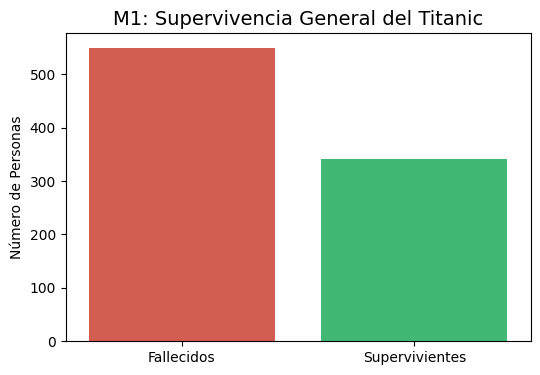

C:\Users\danma\AppData\Local\Temp\ipykernel_6396\3154103093.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


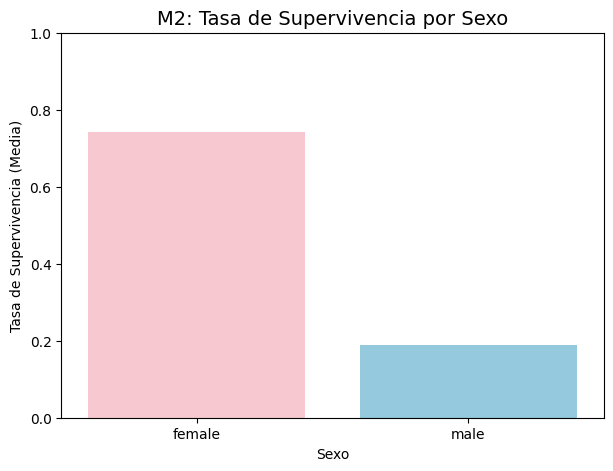

C:\Users\danma\AppData\Local\Temp\ipykernel_6396\3154103093.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


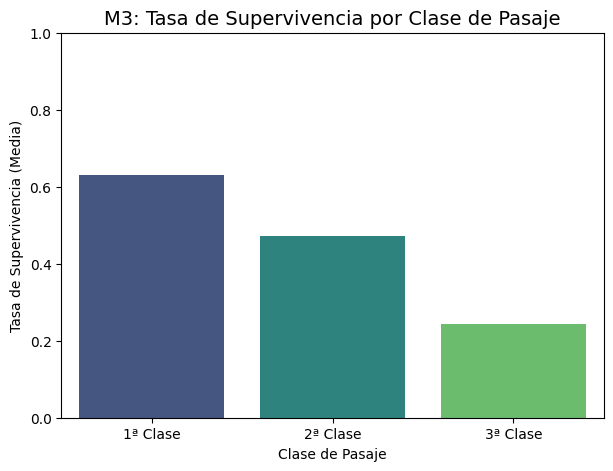

C:\Users\danma\AppData\Local\Temp\ipykernel_6396\3154103093.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


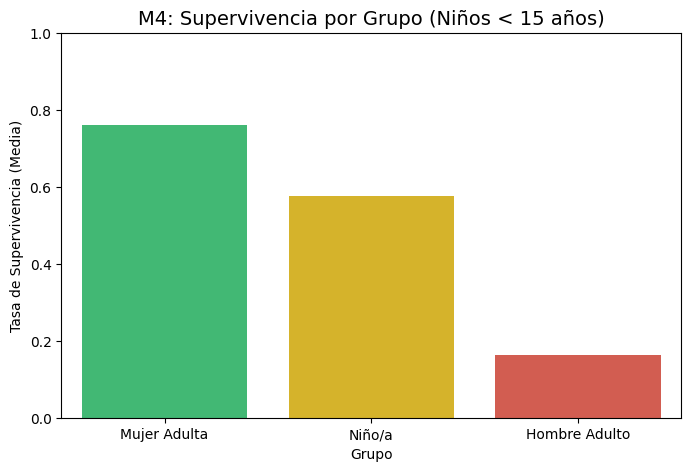

C:\Users\danma\AppData\Local\Temp\ipykernel_6396\3154103093.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


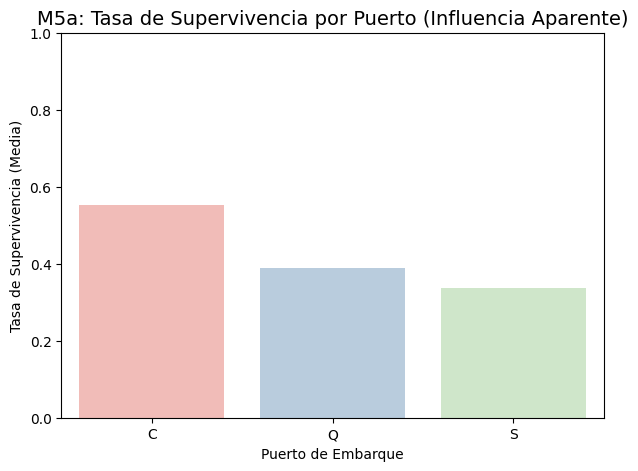

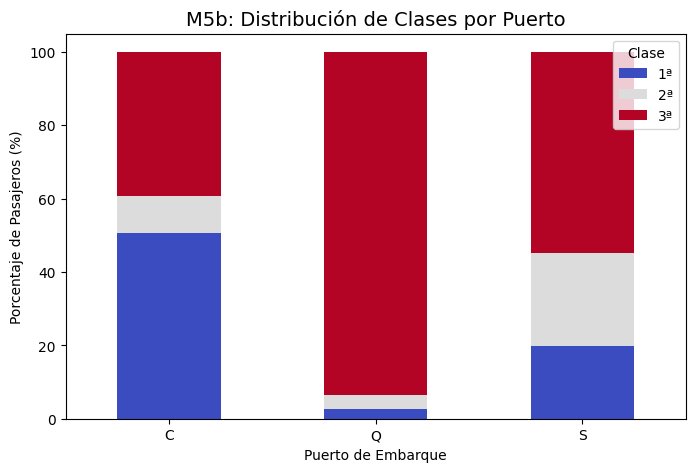

In [20]:
# Importaciones necesarias (si no las tienes al inicio)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos del M1 (calculados previamente en tu código)
# Nota: La tasa de mortalidad es 61.62%.
tasa_mortalidad = 0.6162
total_pasajeros = 891 # Un valor estándar si no se ha limpiado

fallecidos = total_pasajeros * tasa_mortalidad
supervivientes = total_pasajeros * (1 - tasa_mortalidad)

data_m1 = pd.DataFrame({
    'Resultado': ['Fallecidos', 'Supervivientes'],
    'Conteo': [fallecidos, supervivientes]
})

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Resultado', 
    y='Conteo', 
    data=data_m1, 
    palette=['#e74c3c', '#2ecc71'] # Rojo para fallecidos, verde para supervivientes
)
plt.title('M1: Supervivencia General del Titanic', fontsize=14)
plt.ylabel('Número de Personas')
plt.xlabel('')
plt.show() # ```


# Gráfico
plt.figure(figsize=(7, 5))
sns.barplot(
    x='sex', 
    y='survived', 
    data=supervivencia_por_sexo, 
    palette={'male': 'skyblue', 'female': 'pink'}
)
plt.title('M2: Tasa de Supervivencia por Sexo', fontsize=14)
plt.ylabel('Tasa de Supervivencia (Media)')
plt.xlabel('Sexo')
plt.ylim(0, 1) # Normalizar el eje Y de 0 a 1
plt.show() # ```


# Gráfico
plt.figure(figsize=(7, 5))
sns.barplot(
    x='pclass', 
    y='survived', 
    data=supervivencia_por_clase, 
    palette='viridis' 
)
plt.title('M3: Tasa de Supervivencia por Clase de Pasaje', fontsize=14)
plt.ylabel('Tasa de Supervivencia (Media)')
plt.xlabel('Clase de Pasaje')
plt.xticks([0, 1, 2], ['1ª Clase', '2ª Clase', '3ª Clase'])
plt.ylim(0, 1)
plt.show() # ```


# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Grupo', 
    y='survived', 
    data=supervivencia_por_grupo.sort_values(by='survived', ascending=False),
    palette=['#2ecc71', '#f1c40f', '#e74c3c'] # Verde, Amarillo, Rojo para prioridades
)
plt.title('M4: Supervivencia por Grupo (Niños < 15 años)', fontsize=14)
plt.ylabel('Tasa de Supervivencia (Media)')
plt.xlabel('Grupo')
plt.ylim(0, 1)
plt.show() # ```


# Gráfico 1
plt.figure(figsize=(7, 5))
sns.barplot(
    x='embarked', 
    y='survived', 
    data=supervivencia_por_puerto, 
    palette='Pastel1'
)
plt.title('M5a: Tasa de Supervivencia por Puerto (Influencia Aparente)', fontsize=14)
plt.ylabel('Tasa de Supervivencia (Media)')
plt.xlabel('Puerto de Embarque')
plt.ylim(0, 1)
plt.show() # ```


distribucion_clase_por_puerto = pd.crosstab(df_titanic['embarked'], df_titanic['pclass'], normalize='index') * 100

# Gráfico 2
distribucion_clase_por_puerto.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5), 
    colormap='coolwarm'
)
plt.title('M5b: Distribución de Clases por Puerto', fontsize=14)
plt.ylabel('Porcentaje de Pasajeros (%)')
plt.xlabel('Puerto de Embarque')
plt.xticks(rotation=0)
plt.legend(title='Clase', labels=['1ª', '2ª', '3ª'])
plt.show()